In [1]:
# in colab notebook, using packages through mounted google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# install tellurium if necessary -- will need to restart runtime if so
IS_COLAB = True
if IS_COLAB:
  try:
    import tellurium as te
  except:
    !pip install -q tellurium
    import tellurium as te

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tellurium as te

In [4]:
# move to drive folder to access package
%cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [51]:
# import protomer_network class
from protomer_network_distributions import protomer_network

In [52]:
"""
For a more complex example, let's simulate a larger protomer network with additional parameters
This network has species A, B, C, D, E, F and parameters for all possible dimers are used to create the protomer_network class
Additionally, we can provide on rates for some dimers, if we know them
This will only change the time course of the kinetics simulation, but will not change the equilibrium distribution

"""

input_dict = {
              'A_B':10*10**-9,
              'A_C':100*10**-9,
              'A_D':100*10**-9,
              'A_E':100*10**-9,
              'A_F':1000*10**-9,
              'B_C':1*10**-9,
              'B_D':100*10**-9,
              'B_E':100*10**-9,
              'B_F':1000*10**-9,
              'C_D':100*10**-9,
              'C_E':100*10**-9,
              'C_F':1000*10**-9,
              'D_E':100*10**-9,
              'D_F':1000*10**-9,
              'E_F':1000*10**-9,
              'on_A_B': 1 * 10**10,
              'on_B_C': 1 * 10**7
             }

example2 = protomer_network(input_dict)

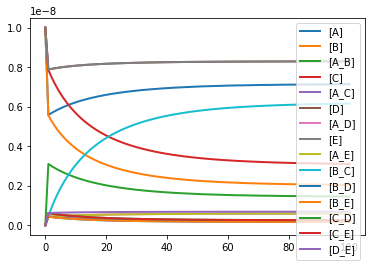

False


In [53]:
"""
In this case, we will only use 5 of the 6 protomers to run a simulation (A, B, C, D, E)
We will turn the model_summary off, but still plot the kinetics simulation
As one of the dimers has a much slower on rate, we will increase the simulation time from 1 to 100
Binding of A_B would produce a signal, as A has a False label and B has a True label
As we can see from the kinetics plot and predicted binary output, even though A_B binds relatively strongly and has a fast on rate, B_C outcompetes
At equilibrium, the slower competition of B_C displaces A_B to remove the signal, as B and C both have True labels

"""

sub_dict = {
            'A':{'label':False},
            'B':{'label':True},
            'C':{},
            'D':{},
            'E':{}
           }

example2.SimulateEquilibriumSpeciesDistribution(sub_dict, equilibrium_time=100, model_summary=False)
print(example2.PredictBinaryOutput())

In [54]:
"""
However, we may want to lower the signal threshold, if we still think the signal from A_B is significant
This is accomplished with the signal_threshold flag
If we lower it from the default 5 * 10**-9 to 1 * 10**-9, the output becomes True

"""

print(example2.PredictBinaryOutput(return_cumulative_signal=True))
print(example2.PredictBinaryOutput(signal_threshold = 1 * 10**-9))

1.4571809561305395e-09
True


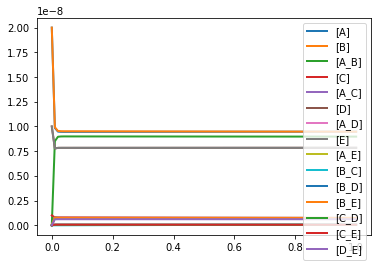

True


In [55]:
"""
If we want to simulate the same protomer network but with different concentrations, we can change the sub dictionary
The concentrations of A, B, and C are altered from the default 10 * 10**-9 M
This changes the predicted binary output from False to True, as the A_B dimer is less out-competed by the B_C dimer

"""

sub_dict = {
            'A':{'label':False, 'concentration': 20 * 10**-9},
            'B':{'label':True, 'concentration': 20 * 10**-9},
            'C':{'concentration': 1 * 10**-9},
            'D':{},
            'E':{}
           }

equilibrium_distribution1 = example2.SimulateEquilibriumSpeciesDistribution(sub_dict, equilibrium_time=1, model_summary=False)
print(example2.PredictBinaryOutput())

A: {'label': False}
B: {'label': True}
C: {}
D: {}
E: {}


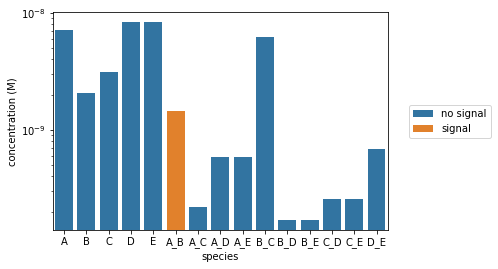

False
-----------------------------------------------------------
A: {'label': False, 'concentration': 2e-08}
B: {'label': True, 'concentration': 2e-08}
C: {'concentration': 1e-09}
D: {}
E: {}


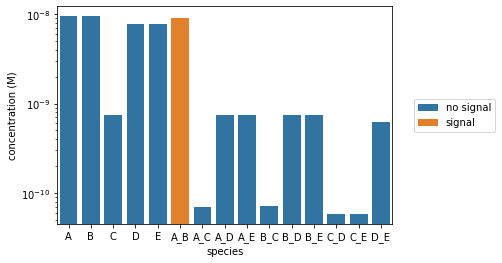

True


In [69]:
"""
Lastly, if we run multiple simulations and want to go back and see each of them, we can access them with the 'simulation_ind' flag
The simulations are also stored in the protomer network class with the same indices, so we can see the sub dictionaries and equilibrium distributions

"""

for species in example2.simulations[0]:
  print(f'{species}: {example2.simulations[0][species]}')
example2.VisualizeEquilibriumDistribution(simulation_ind=0)
plt.show()
print(example2.PredictBinaryOutput(simulation_ind=0))

print('-----------------------------------------------------------')

for species in example2.simulations[1]:
  print(f'{species}: {example2.simulations[1][species]}')
example2.VisualizeEquilibriumDistribution(simulation_ind=1)
plt.show()
print(example2.PredictBinaryOutput(simulation_ind=1))